In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from collections import Counter

1000004.11178


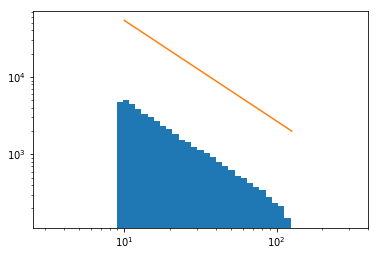

9.00001632105
119.962656742


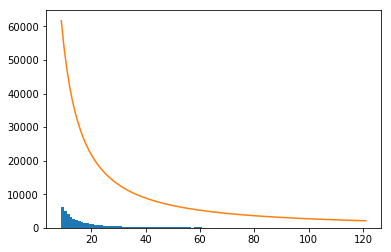

In [8]:
#High_Mass_Casey IMF. cluster mass of 10**6 M_sol
mass_array = np.loadtxt("highmasses.txt", delimiter = " " )

clustermass = np.sum(mass_array)
print(clustermass)

x = np.logspace(1,2.1)
plt.hist(mass_array, bins = np.logspace(0.5,2.5,50))
plt.plot(x,1.0735*10**6*x**-1.3)
plt.xscale('log')
plt.yscale('log')
plt.show()

xbins = np.linspace(9,121,111)
plt.hist(mass_array, bins = xbins)
plt.plot(xbins, 1.0735*10**6*xbins**-1.3)
plt.show()

In [9]:
#Given the ZAMS mass, gives the remnant mass and type of compact object
#Slightly different version of getRemnantMass
#Assumptions: all neutron stars are the same mass
#Assumptions: WD progenitor masses go from 1 to 9 solar masses
def getRemMass(MZAMS,f_ej):
    """
    type BH = Black Hole
    type NS = Neutron Star
    type WD = White Dwarf
    type small = out of lower range
    type big = out of upper range
    """
    n = random.randint(1,101)
    if (MZAMS >= 0.5) and (MZAMS < 9):
        typecode = 'WD'
        return 0.358 + 0.123 * MZAMS,typecode
    elif (MZAMS >= 9) and (MZAMS <= 15):
        typeCode = 'NS'
        return 1.6,typeCode
    elif (MZAMS > 15) and (MZAMS <= 17.8):
        if n > 68:
            typeCode = 'BH'
            return BHMassExtrapolate(MZAMS,f_ej),typeCode
        else:
            typeCode = 'NS'
            return 1.6,typeCode
    elif (MZAMS > 17.8) and (MZAMS <= 18.5):
        if n > 83:
            typeCode = 'BH'
            return BHMassExtrapolate(MZAMS,f_ej),typeCode
        else:
            typeCode = 'NS'
            return 1.6,typeCode
    elif (MZAMS > 18.5) and (MZAMS <= 21.7):
        if n > 50:
            typeCode = 'BH'
            return BHMassExtrapolate(MZAMS,f_ej),typeCode
        else:
            typeCode = 'NS'
            return 1.6,typeCode
    elif (MZAMS > 21.7) and (MZAMS <= 25.2):
        typeCode = 'BH'
        return BHMassExtrapolate(MZAMS,f_ej),typeCode
    elif (MZAMS > 25.2) and (MZAMS <= 27.5):
        if n > 65:
            typeCode = 'BH'
            return BHMassExtrapolate(MZAMS,f_ej),typeCode
        else:
            typeCode = 'NS'
            return 1.6,typeCode
    elif (MZAMS > 27.5) and (MZAMS <= 60):
        typeCode = 'BH'
        if MZAMS > 42:
            return BHMassExtrapolate(MZAMS,f_ej),typeCode
        else:
            return BHMassCoreHigh(MZAMS),typeCode
    elif (MZAMS > 60) and (MZAMS <= 120):
        if n > 40:
            typeCode = 'BH'
            return BHMassCoreHigh(MZAMS),typeCode
        else:
            typeCode = 'NS'
            return 1.6,typeCode
    elif MZAMS < 0.5:
        typeCode = 'small'
        return 0, typeCode
    else:
        typeCode = 'big'
        return 0, typeCode 

Counter({'NS': 30653, 'BH': 15265})


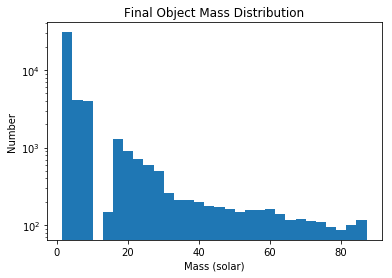

In [4]:
#Equation (1)
def BHMassCore(MZAMS):
    return -1.98 + 0.411*MZAMS

#Equation (2)
def BHMassAll(MZAMS):
    return 16.1 - 0.194 * (MZAMS - 23.9) - 0.041 * (MZAMS - 23.9)**2 + 0.00307 * (MZAMS - 23.9)**3

#Equation (3)
def BHMassCoreHigh(MZAMS):
    return 5.796 + 1.05 * 10**9 * MZAMS**-4.94

#Equation (4)
def BHMassExtrapolate(MZAMS, f_ej):
    return f_ej * BHMassCore(MZAMS) + (1 - f_ej) * BHMassAll(MZAMS)

#Branch I, this is defined different from the paper
BHmassRange1 = np.linspace(15,42.22)

#Branch II, this is defined different from the paper
BHmassRange2 = np.linspace(42.22,120)

typeArray = massArray = []

#number of progenitor stars
N = len(mass_array)

for i in range(N):
    remnantMass, typeCode = getRemMass(mass_array[i],0.9)
    massArray = np.append(massArray, remnantMass)
    typeArray = np.append(typeArray, typeCode)
    
#counts the different types    
print(Counter(typeArray))    

BHarray = [i for i in massArray if i > 3]    
NSarray = [i for i in massArray if i <= 3 and i > 1.44]
WDarray = [i for i in massArray if i > 0 and i <= 1.44]
NAarray = [i for i in massArray if i == 0]

#plot the mass distribution
plt.hist(massArray, bins = 10*3)
plt.xlabel("Mass (solar)")
plt.ylabel("Number")
plt.title("Final Object Mass Distribution")
#plt.xscale('log')
plt.yscale('log')
plt.show()

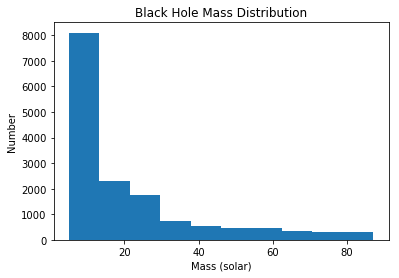

In [6]:
plt.hist(BHarray)
plt.xlabel("Mass (solar)")
plt.ylabel("Number")
plt.title("Black Hole Mass Distribution")
plt.show()

In [7]:
np.sort(NSarray)

array([ 1.6,  1.6,  1.6, ...,  1.6,  1.6,  1.6])

In [8]:
np.sort(BHarray)

array([  5.00813051,   5.00920837,   5.01002752, ...,  87.16002824,
        87.17162862,  87.17461826])